# Pennlyane Bell State

In [2]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

- Set up a Pennylane device.
    - Set wires=2, for two qubits.
    - Set the desired number of shots for the experiment.

In [3]:
dev = qml.device("default.qubit", wires=2, shots=1024)

- Define a quantum node on this device.

    - Apply a Hadamard to the first qubit. 

    - Apply a CNOT, targeting the second qubit.

    - Measure the two qubits 

In [4]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

- Sample returns eigenvalues instead of state labels. So 1 corresonds to state |0> and -1 corresponds to state |1>

In [5]:
result = circuit()
print(result)

[[-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]]


- Plot the eigenvalues on a histogram

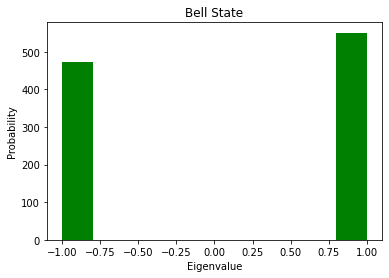

In [7]:
plt.hist((result[0]+result[1])//2, facecolor='g')

plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Bell State')

plt.show()